In [203]:
def calculate_time_difference(df):
    # Find the last occurrence of the minimum and the first occurrence of the maximum
    last_min_index = df[df['replicas'] == df['replicas'].min()].index[-1]
    first_max_index = df[df['replicas'] == df['replicas'].max()].index[0]

    last_min_time = df.loc[last_min_index, 'time']
    first_max_time = df.loc[first_max_index, 'time']

    # Calculate the time difference
    time_difference = first_max_time - last_min_time
    print(f"Time difference: {time_difference}")
    return time_difference

{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736094180, '1'], [1736094190, '1'], [1736094200, '1'], [1736094210, '1'], [1736094220, '1'], [1736094230, '1'], [1736094240, '2'], [1736094250, '2'], [1736094260, '2'], [1736094270, '4'], [1736094280, '4'], [1736094290, '4'], [1736094300, '8'], [1736094310, '8'], [1736094320, '8'], [1736094330, '14'], [1736094340, '14'], [1736094350, '14'], [1736094360, '28'], [1736094370, '28'], [1736094380, '28'], [1736094390, '52'], [1736094400, '52'], [1736094410, '52'], [1736094420, '77'], [1736094430, '77'], [1736094440, '77'], [1736094450, '143'], [1736094460, '143'], [1736094470, '143'], [1736094480, '166'

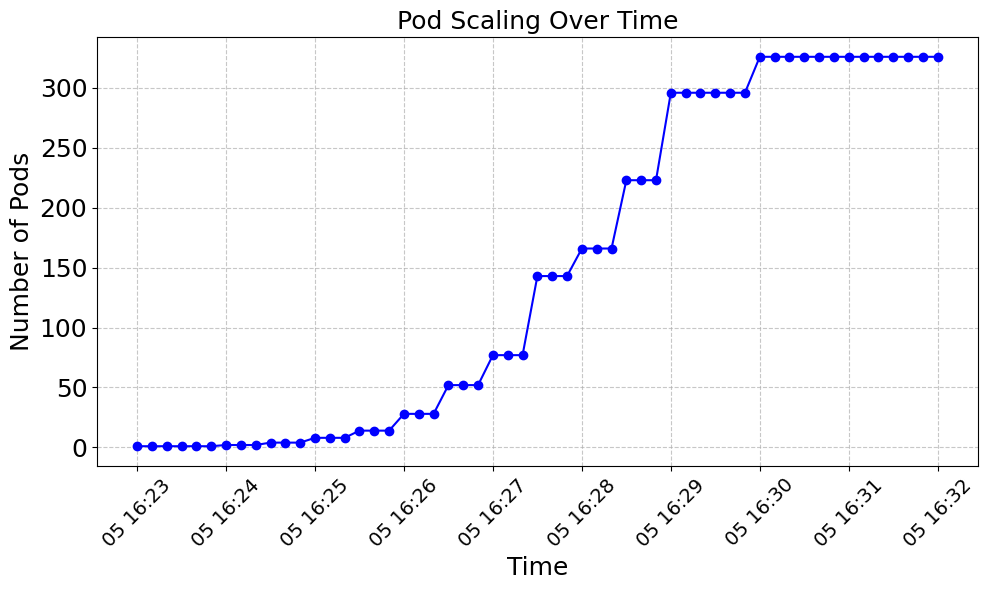

Time difference: 0 days 00:06:10


Timedelta('0 days 00:06:10')

In [209]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T16:20:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T16:32:00Z",    # End time in ISO8601 format
    "step": "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling1.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()
calculate_time_difference(df)


{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736095740, '1'], [1736095750, '1'], [1736095760, '1'], [1736095770, '2'], [1736095780, '2'], [1736095790, '2'], [1736095800, '4'], [1736095810, '4'], [1736095820, '4'], [1736095830, '8'], [1736095840, '8'], [1736095850, '8'], [1736095860, '15'], [1736095870, '15'], [1736095880, '15'], [1736095890, '20'], [1736095900, '20'], [1736095910, '20'], [1736095920, '37'], [1736095930, '37'], [1736095940, '37'], [1736095950, '45'], [1736095960, '45'], [1736095970, '45'], [1736095980, '78'], [1736095990, '78'], [1736096000, '78'], [1736096010, '90'], [1736096020, '90'], [1736096030, '90'], [1736096040, '90']

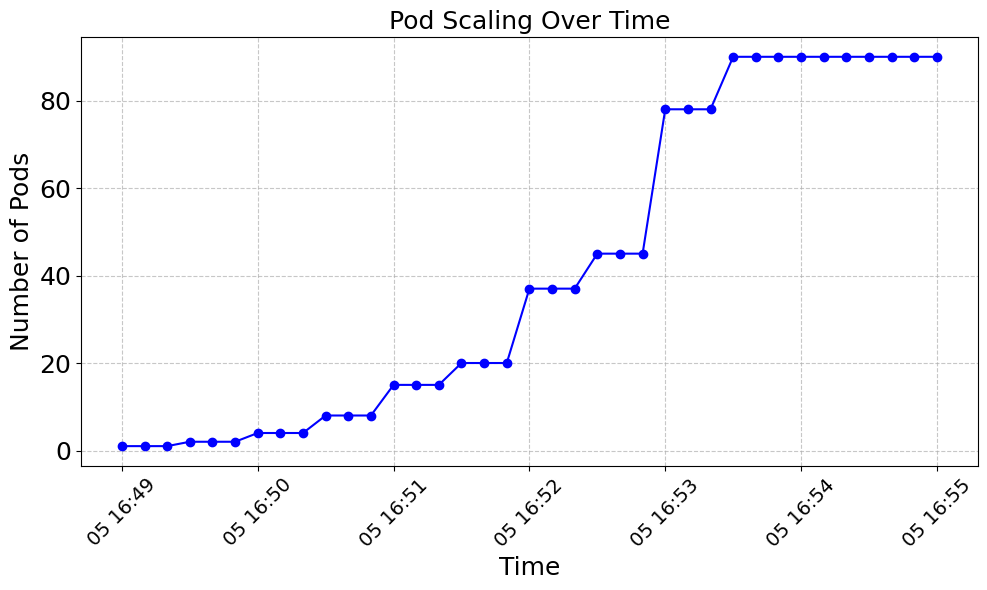

Time difference: 0 days 00:04:10


Timedelta('0 days 00:04:10')

In [210]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T16:49:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T16:55:00Z",    # End time in ISO8601 format
    "step": "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling2.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()
calculate_time_difference(df)



{'status': 'success', 'data': {'resultType': 'matrix', 'result': [{'metric': {'__name__': 'kube_deployment_status_replicas', 'container': 'kube-state-metrics', 'deployment': 'ros', 'endpoint': 'http', 'instance': '10.32.0.43:8080', 'job': 'kube-state-metrics', 'namespace': 'ros', 'pod': 'prometheus-kube-state-metrics-66f5694654-425n9', 'service': 'prometheus-kube-state-metrics'}, 'values': [[1736096610, '1'], [1736096620, '1'], [1736096630, '1'], [1736096640, '2'], [1736096650, '2'], [1736096660, '2'], [1736096670, '2'], [1736096680, '2'], [1736096690, '2'], [1736096700, '3'], [1736096710, '3'], [1736096720, '3'], [1736096730, '4'], [1736096740, '4'], [1736096750, '4'], [1736096760, '5'], [1736096770, '5'], [1736096780, '5'], [1736096790, '6'], [1736096800, '6'], [1736096810, '6'], [1736096820, '6'], [1736096830, '6'], [1736096840, '6'], [1736096850, '7'], [1736096860, '7'], [1736096870, '7'], [1736096880, '8'], [1736096890, '8'], [1736096900, '8'], [1736096910, '10'], [1736096920, '10

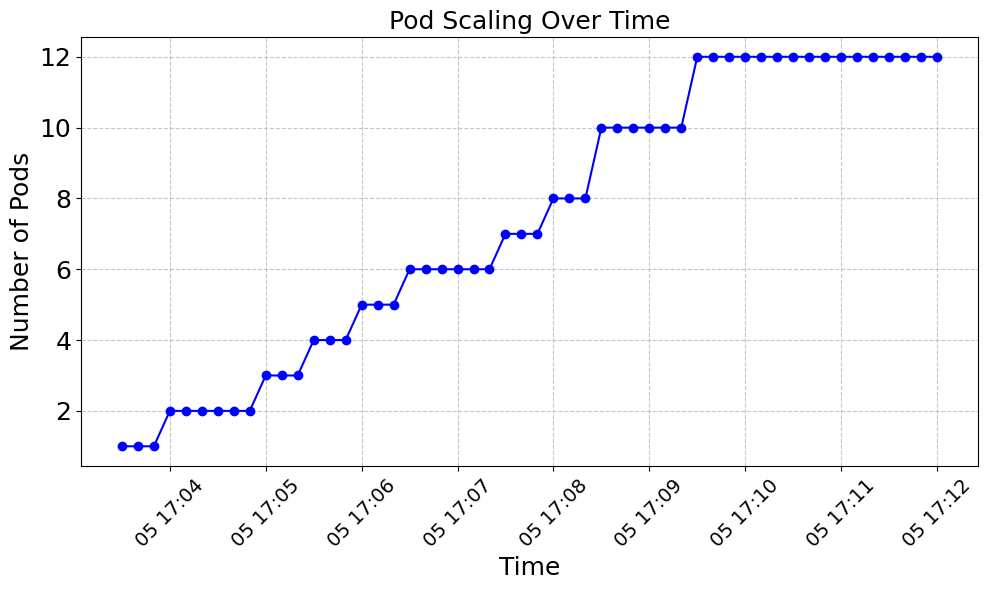

Time difference: 0 days 00:05:40


Timedelta('0 days 00:05:40')

In [211]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# Prometheus API endpoint and query
PROMETHEUS_URL = "http://192.168.56.10:30090/api/v1/query_range"
QUERY = 'kube_deployment_status_replicas{deployment="ros",namespace="ros"}'
params = {
    "query": QUERY,
    "start": "2025-01-05T17:00:00Z",  # Start time in ISO8601 format
    "end":   "2025-01-05T17:12:00Z",    # End time in ISO8601 format
    "step":  "10s"                     # Query step duration
}

# Fetch data from Prometheus
response = requests.get(PROMETHEUS_URL, params=params)
data = response.json()

print(data)

# Extract and format data
results = data['data']['result'][0]['values']
timestamps, replicas = zip(*[(float(ts), float(val)) for ts, val in results])

# Convert to DataFrame
df = pd.DataFrame({'time': pd.to_datetime(timestamps, unit='s'), 'replicas': replicas})

# Plot the scaling data
plt.figure(figsize=(10, 6))
plt.plot(df['time'], df['replicas'], marker='o', linestyle='-', color='b')
plt.title("Pod Scaling Over Time", fontsize=18)
plt.xlabel("Time", fontsize=18)
plt.ylabel("Number of Pods", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=18)
plt.grid(visible=True, linestyle="--", alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
# plt.savefig('scaling3.pdf', format='pdf', dpi=100, bbox_inches='tight')
plt.show()

calculate_time_difference(df)




In [2]:
from prometheus_api_client import PrometheusConnect
from datetime import datetime, timedelta  
import pandas as pd 
import yaml
import json
prom = PrometheusConnect(url ="http://192.168.56.10:30090", disable_ssl=True)
prom